In [2]:
#import
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import matplotlib as plt

## Prepare Data

In [3]:
import pymongo
host='47.103.52.183'
port=27017
username="test"
password="123123"
role = "admin"
mongo_uri = "mongodb://%s:%s@%s:%s/%s" % (username, password, host, port, role)
conn = pymongo.MongoClient(mongo_uri)
db = conn['futureData']

In [19]:
def read_mongo(db,collection, query={},projection={},no_id=True,limit = 10):
    """ Read from Mongo and Store into DataFrame. """

    #return db[collection]
    cursor = db[collection].find(filter=query,projection= projection).limit(limit)
    
    # Expand the cursor and construct the DataFrame
    df = pd.DataFrame(list(cursor))
    #df.to_csv("abc.csv", encoding="utf_8_sig")  # 处理中文乱码问题

    if no_id:
        del df['_id']

    return df
def standard_data(df):
    
    return df.set_index('recordTime').resample('500ms').last().ffill().sort_index(ascending=False)

In [21]:
projection = {
              'InstrumentID':1,'TradingDay':1,'UpdateTime':1,
              'recordTime':1,'BidPrice1':1,'BidVolume1':1,
              'AskPrice1':1,'AskVolume1':1,'LastPrice':1
             }
query = {
    "recordTime":{"$gte":dt.datetime(2019,5,9,9,0,0)}
}
leg1 = standard_data(read_mongo(db,collection='IC1905',query=query,projection=projection,limit=40000))
leg2 = standard_data(read_mongo(db,collection='IC1909',query=query,projection=projection,limit=40000))

In [61]:
con1 = leg1.index > dt.datetime(2019,5,9,9,31,0) 
con2 = leg1.index < dt.datetime(2019,5,9,11,31,0)
ana_leg1 = leg1[np.logical_and(con1,con2)]


con1 = leg2.index > dt.datetime(2019,5,9,9,31,0) 
con2 = leg2.index < dt.datetime(2019,5,9,11,31,0)
ana_leg2 = leg2[np.logical_and(con1,con2)]

In [62]:
result = ana_leg1.LastPrice - ana_leg2.LastPrice

In [65]:
std_result = (result - result.mean()) / result.std()

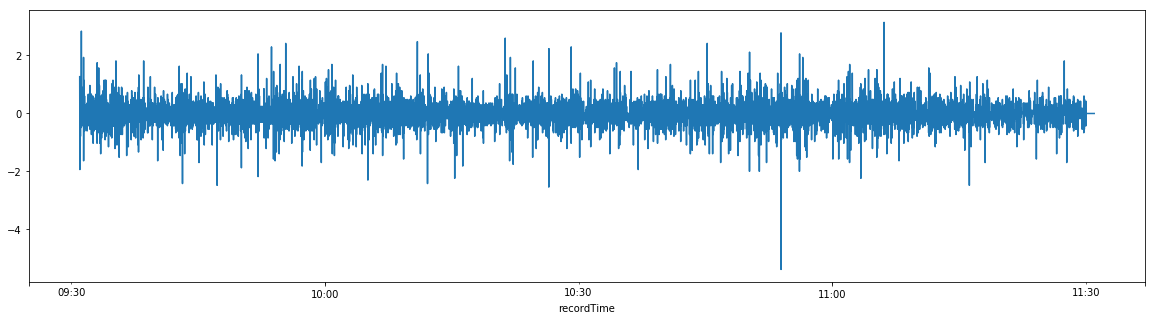

In [69]:
std_result.diff(1).plot(figsize = (20,5))

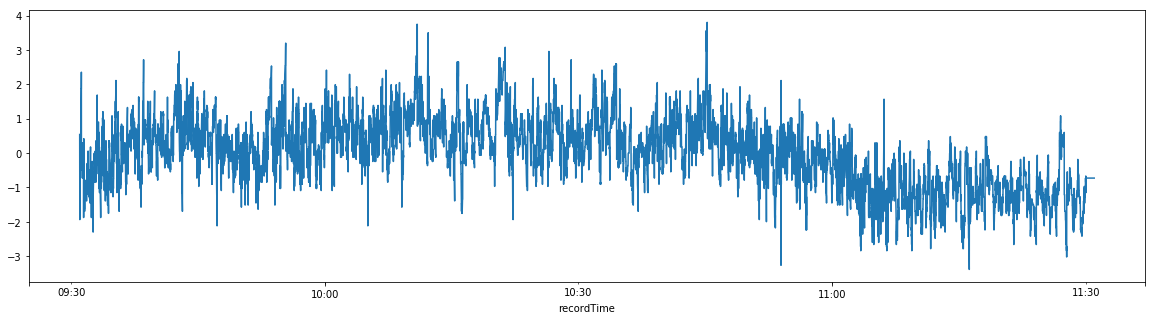

In [70]:
std_result.plot(figsize = (20,5))